In [7]:
%matplotlib inline
 
import random
import sys
from pathlib import Path
from typing import Dict
from typing import List
import matplotlib
import matplotlib.cbook as cbook
import matplotlib.pyplot as plt

sys.path.append('../')
from src.functions import from_tsv_to_list

In [8]:
DIR_PATH = f'{str(Path.cwd().parent)}'

# test
in_test = from_tsv_to_list(f'{DIR_PATH}/preprocessed_annotations/test-A/in.tsv')
expected_list = from_tsv_to_list(f'{DIR_PATH}/preprocessed_annotations/test-A/out.tsv', skip_empty_lines=False)

path_to_photos = f'{DIR_PATH}/scraped_photos/'

In [9]:
def show_random_img_with_all_annotations(
    in_list: List,
    expected_list: List,
    path_to_photos: str,
    matplotlib_colours_dict: Dict,
    confidence_level: float = 0.2,
    pages: int = 5,
) -> None:
    prev = []
    for i in range(pages):
        random_img = random.randint(0, len(in_list))
        if random_img in prev:
            i -= 1
        prev.append(random_img)
        file_name = in_list[random_img]
        print(file_name)

        with cbook.get_sample_data(path_to_photos + file_name) as image_file:
            image = plt.imread(image_file)

        fig, ax = plt.subplots(figsize=(15, 10))
        ax.imshow(image, cmap="gray")

        if expected_list[random_img] != "":
            annotations = expected_list[random_img].split(" ")
            for i in range(len(annotations)):
                annotation = annotations[i].split(":")
                score = annotation[2]
                if confidence_level > float(score):
                    continue
                bbox = annotation[1].split(",")
                x0, y0 = int(bbox[0]), int(bbox[1])
                x1, y1 = int(bbox[2]), int(bbox[3])
                width, height = x1 - x0, y1 - y0
                cat_name = f"{annotation[0]} {round(float(score)*100,2)}%"
                rect = matplotlib.patches.Rectangle(
                    (x0, y0),
                    width,
                    height,
                    linewidth=1,
                    edgecolor=matplotlib_colours_dict[annotation[0]],
                    facecolor="none",
                )
                ax.add_patch(rect)
                ax.text(
                    x0,
                    y0,
                    cat_name,
                    fontsize=8,
                    backgroundcolor="black",
                    color=matplotlib_colours_dict[annotation[0]],
                )

        plt.show()

In [10]:
colors_dict = {
    'photograph': 'lime',
    'illustration': 'orangered', 
    'map': 'yellow', 
    'cartoon': 'deepskyblue', 
    'editorial_cartoon': 'violet', 
    'headline': 'cyan', 
    'advertisement': 'deeppink'
    }

2633.jpg


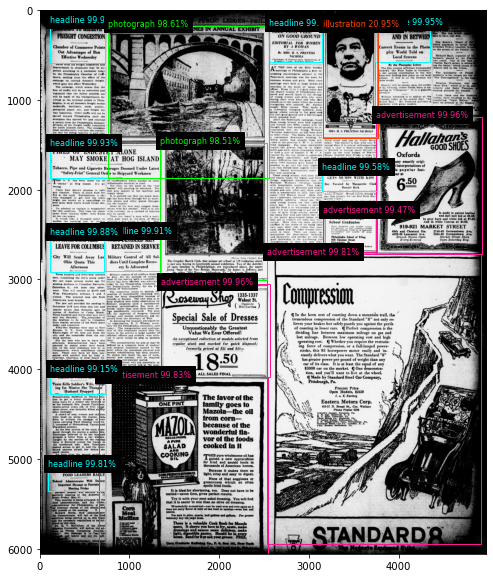

1553.jpg


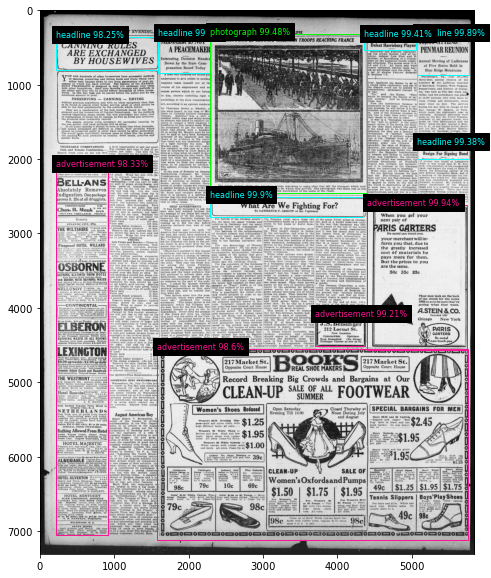

3316.jpg


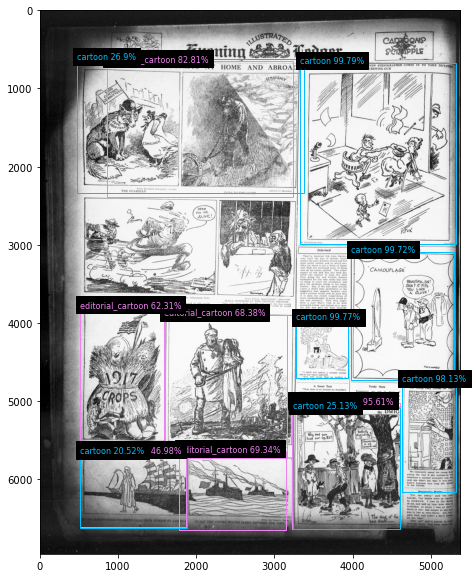

2978.jpg


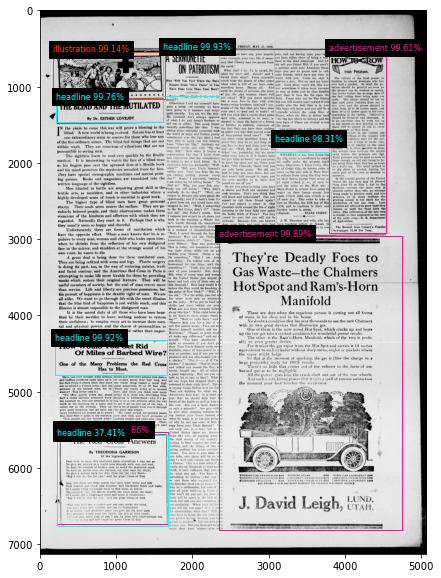

2653.jpg


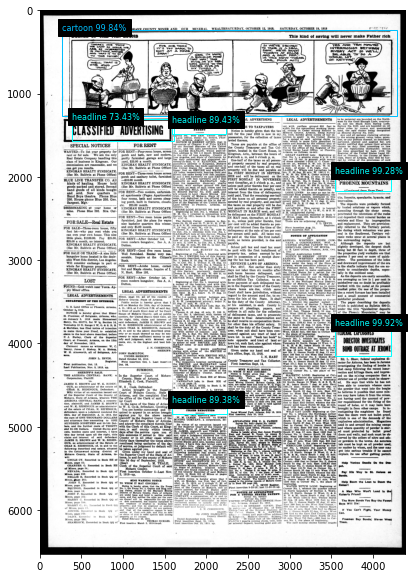

In [11]:
# some random images with annotations
show_random_img_with_all_annotations(
    in_test,
    expected_list,
    path_to_photos,
    colors_dict,
    confidence_level=0.2,
    pages=5
)